In [1]:
import os
import sys
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_settings_v3 import *
from auxiliary import get_base_network_name, read_data_file
from auxiliary import getLinearReg

sys.path.append('fast')
from functions import percolate, edgelist_to_nn_set

%matplotlib inline

networks_dir = os.path.join('..', 'networks')

In [3]:
net_type = 'DT'
param = 'param'
attack = 'Btw'

size = 16384
seed = 0

base_net_name, base_net_name_size = get_base_network_name(net_type, size, param)
net_name = base_net_name_size + '_{:05d}'.format(seed)
net_dir = os.path.join(networks_dir, net_type, base_net_name, base_net_name_size, net_name)
attack_dir = os.path.join(net_dir, attack)

edgelist = read_data_file(net_dir, net_name, 'numpyInt', file_ext='.txt', compress_ext='.tar.gz')
oi_list = read_data_file(attack_dir, 'oi_list', 'numpyInt', file_ext='.txt', compress_ext='.tar.gz')

nn_set = edgelist_to_nn_set(edgelist)

NameError: name 'networks_dir' is not defined

In [50]:
Ngcc = np.array(percolate(nn_set, oi_list))

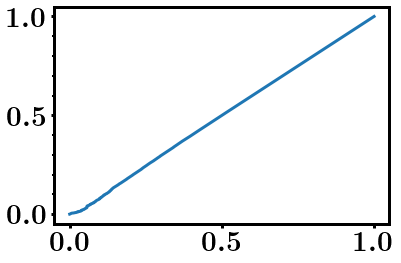

In [51]:
X = np.arange(size) / size
Y = Ngcc / size

fig, ax = plt.subplots()

#ax.set_xlim([-0.01, 0.2])
#ax.set_ylim([-0.01, 0.2])

#ax.plot(X[:100], Y[:100])
ax.plot(X, Y)

plt.show()

In [3]:
from planar import create_mr_edgelist, create_points

def get_r_from_meank(meank, N):

    # Ignoring borders
    #r = np.sqrt((1/np.pi)*((meank-1)/(N-1)))
    r = np.sqrt((1/np.pi)*((meank)/(N)))
    return r

In [5]:
expected_k = 6
N_values = np.power(2, np.arange(7, 16))
iterations = 10
print(N_values)

data = np.zeros((len(N_values), iterations))
for i, N in enumerate(N_values):
    for j in range(iterations):
        points = create_points(N)
        r = get_r_from_meank(expected_k, N)
        edgelist = create_mr_edgelist(points, r=r)
        M = len(edgelist)
        meank = 2*M/N
        data[i,j] = meank
        avg_meank = data[i].mean()
        std_meank = data[i].std()
        
    print(f'{N:5d} {r:.5f} {avg_meank:.3f} {std_meank:.3f}')

[  128   256   512  1024  2048  4096  8192 16384 32768]
  128 0.12215 5.463 0.332
  256 0.08637 5.472 0.114
  512 0.06108 5.625 0.142
 1024 0.04319 5.723 0.070
 2048 0.03054 5.803 0.028
 4096 0.02159 5.881 0.054
 8192 0.01527 5.919 0.039
16384 0.01080 5.942 0.036


KeyboardInterrupt: 

[0.11876361 0.08397856 0.05938181 0.04198928 0.0296909  0.02099464
 0.01484545 0.01049732 0.00742273]


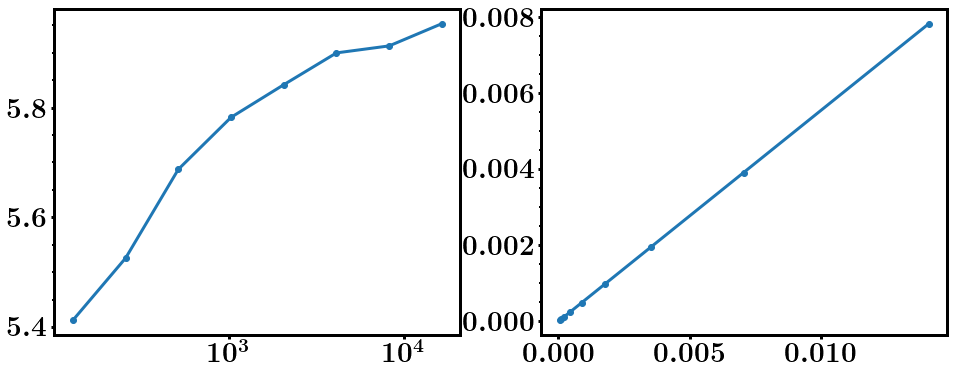

In [36]:
r_values = get_r_from_meank(meank, N_values)
print(r_values)
ncols = 2
fig, axes = plt.subplots(figsize=(8*ncols, 6), ncols=ncols)

ax = axes[0]
ax.set_xscale('log')
ax.plot(N_values[:-1], data[:-1].mean(axis=1), '-o')

ax = axes[1]
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.plot(r_values**2, 1/N_values, '-o')
plt.show()

In [34]:
N_values = np.power(2, np.arange(7, 16))

In [4]:
tol = 1e-10

expected_k = 6
#N_values = np.power(2, np.arange(11, 12))
N_values = np.array([128, 256])
iterations = 100
print(N_values)

r_values = {
    #128: get_r_from_meank(expected_k, 128)
    128: 0.125,
    256: get_r_from_meank(expected_k, 256) + 0.1,
    1024: 1.0255*get_r_from_meank(expected_k, 1024),
    #2048: 1.013*get_r_from_meank(expected_k, 2048),
    2048: 0.030934646534853616,
    4096: 1.01*get_r_from_meank(expected_k, 4096),
    8192: 1.0065*get_r_from_meank(expected_k, 8192),
    16384: 1.0026*get_r_from_meank(expected_k, 16384) # prev 1.00255
}
for k, v in r_values.items():
    print(f'{k:5d} {v:.5f}')

data2 = np.zeros((len(N_values), iterations))
for i, N in enumerate(N_values):
    r = r_values[N]
    print(N, r)
    
    lowers = largers = 0
    for j in range(iterations):
        points = create_points(N)
            
        edgelist = create_mr_edgelist(points, r=r)
        M = len(edgelist)
        meank = 2*M/N
        
        
        if meank < expected_k:
            lowers += 1
        else:
            largers += 1
        
        diff = np.fabs(expected_k - meank)
        if diff < tol:
            print(f'iteration {j}:', meank)
            print('lowers/largers = ', lowers/largers)
            break
        data2[i,j] = meank
        
        print(f'{meank:.5f} {lowers/(j+1):.3f} {data2[i,:j+1].mean():.4f}')
        
    print('lowers/largers = ', lowers/largers)    
    avg_meank = data2[i].mean()
    std_meank = data2[i].std()
    print(f'{N:5d} {r:.5f} {avg_meank:.3f} {std_meank:.3f}')

[16384]


NameError: name 'get_r_from_meank' is not defined

In [4]:
expected_k = 6

prefactors = {
    256: 1.0422,
    512: 1.0285,
    1024: 1.0203,
    2048: 1.0135,
    4096: 1.009,
    8192: 1.0068,
    16384: 1.0035,
    32768: 1.0026,
    65536: 1.0012
}

r_values = {N: prefactors[N]*get_r_from_meank(expected_k, N)  for N in prefactors.keys()}

iterations = {
    256: 500,
    512: 500,
    1024: 100,
    2048: 60,
    4096: 20,
    8192: 10,
    16384: 6,
    32768: 2,
    65536: 2
}

#N_values = np.power(2, np.arange(7, 16))
#N_values = [1024, 2048, 4096, 8192, 16384]
N_values = [65536]

print(N_values)
print('N     r       avg_k     std_k     err')
#data = np.zeros((len(N_values), iterations))
all_data = {}
for i, N in enumerate(N_values):
    data = np.zeros(iterations[N])
    for j in range(iterations[N]):
        #print(j, N)
        points = create_points(N)
        #r = get_r_from_meank(expected_k, N)
        r = r_values[N]
        edgelist = create_mr_edgelist(points, r=r)
        M = len(edgelist)
        meank = 2*M/N
        data[j] = meank
        
    avg_meank = data.mean()
    std_meank = data.std() / np.sqrt(iterations[N])
    all_data[N] = data
        
    relative_err = (avg_meank - expected_k) / expected_k
    print(f'{N:5d} {r:.5f} {avg_meank:.4f} {std_meank:.4f} {relative_err:.4f}')

[65536]
N     r       avg_k     std_k     err
65536 0.00540 5.9796 0.0058 -0.0034


In [34]:
expected_k = 6
N_values = np.power(2, np.arange(9, 15))
iterations = 10
print(N_values)

data = np.zeros((len(N_values), iterations))
for i, N in enumerate(N_values):
    for j in range(iterations):
        points = create_points(N)
        r = get_r_from_meank(expected_k, N)
        start = time.perf_counter()
        edgelist = create_mr_edgelist(points, r=r)
        end = time.perf_counter()
        diff = end - start
        M = len(edgelist)
        data[i,j] = diff
        
    mean_time = data[i].mean()
        
    print(f'{N:5d} {mean_time:.6f}')
    


[  512  1024  2048  4096  8192 16384]
  512 0.152347
 1024 0.336305
 2048 0.838021
 4096 2.224355
 8192 6.394656


KeyboardInterrupt: 

NameError: name 'N_values' is not defined

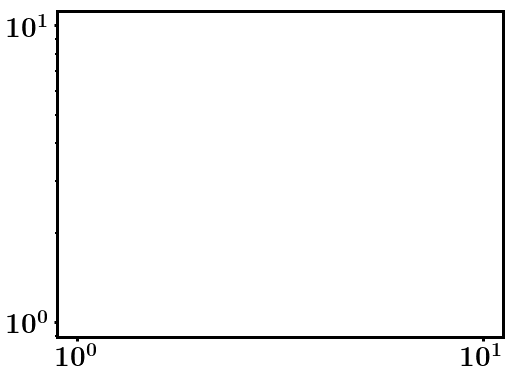

In [12]:
fig, ax = plt.subplots(figsize=(8,6))

ax.set_xscale('log')
ax.set_yscale('log')

X = N_values
Y = data.mean(axis=1)

Y_pred, slope, y_err = getLinearReg(X, Y)

label = r'${{{:.3f}}}\pm{{{:.3f}}}$'.format(slope, y_err)

ax.plot(X, Y, 'o-')

ax.plot(X, Y_pred, '--', color='k', label=label)
ax.legend()
plt.show()

In [4]:
net_type = 'MR'
param = '6.00'

size = 1024
nseeds = 100
seeds = range(nseeds)
data = np.zeros(nseeds)
for i, seed in enumerate(seeds):

    base_net_name, base_net_name_size = get_base_network_name(net_type, size, param, meank=True)
    net_name = base_net_name_size + '_{:05d}'.format(seed)
    net_dir = os.path.join(networks_dir, net_type, base_net_name, base_net_name_size, net_name)

    g = read_data_file(net_dir, net_name, 'igraph')

    meank = np.mean(g.degree())
    data[i] = meank

In [5]:
data.mean(), data.std() / np.sqrt(nseeds)

(6.01703125, 0.011462600264947932)